In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep=',')


In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_df.tail()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.tail()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [6]:
training = np.array(fashion_train_df, dtype='float32')
testing = np.array(fashion_test_df, dtype='float32')


8.0

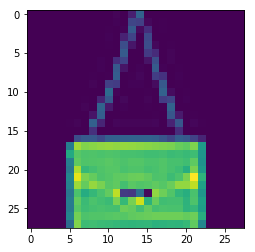

In [7]:
import random
i = random.randint(1,60000)

plt.imshow(training[i, 1:].reshape(28,28))
label = training[i, 0]
label

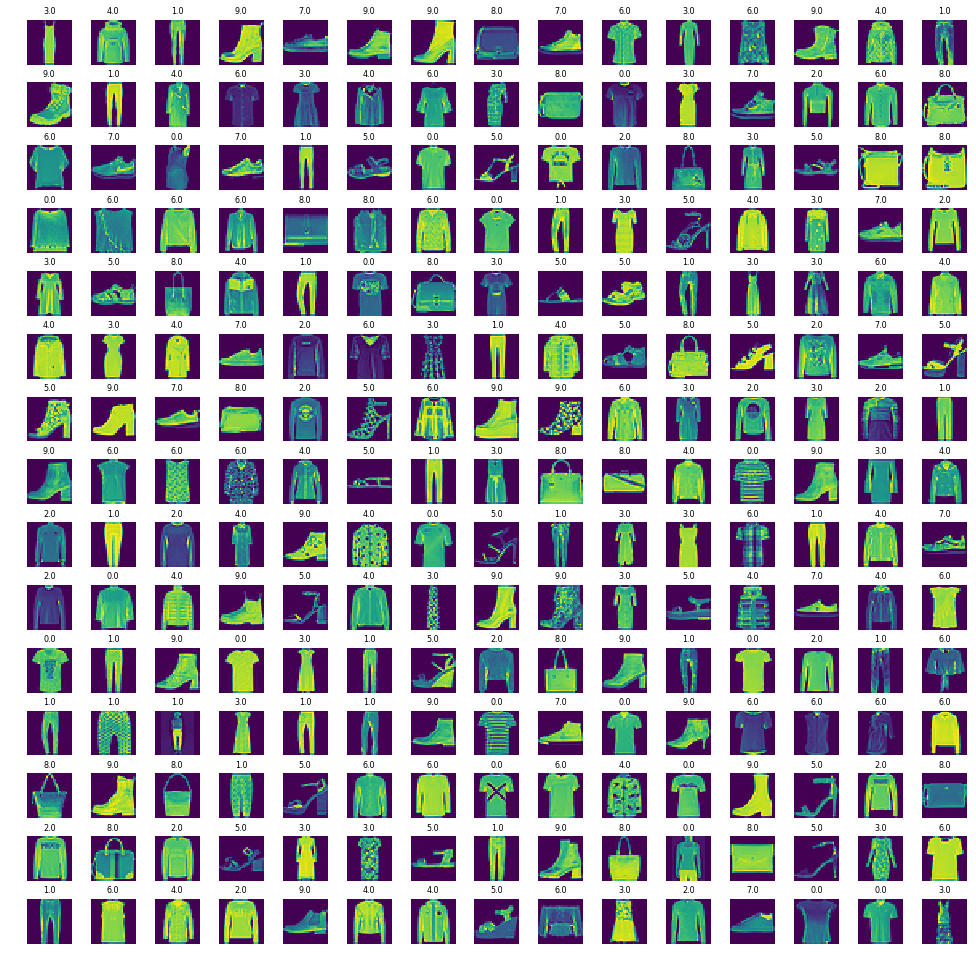

In [8]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    
    index = np.random.randint(0, n_training)

    axes[i].imshow(training[index, 1:].reshape(28,28))

    axes[i].set_title(training[index, 0], fontsize=8)

    axes[i].axis('off')

    plt.subplots_adjust(hspace=0.4)


 # Training

In [9]:
X_train = training[:, 1:] /255
y_train = training[:, 0]


In [10]:
X_test = testing[:, 1:] /255
y_test = testing[:, 0]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split( X_train, y_train, test_size=0.2, random_state=12345)


In [12]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], * (28,28,1))

X_validate = X_validate.reshape(X_validate.shape[0], * (28,28,1))


In [13]:
X_train.shape

(48000, 28, 28, 1)

In [14]:
X_test.shape

(10000, 28, 28, 1)

In [15]:
X_validate.shape

(12000, 28, 28, 1)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from keras.optimizers import adam
from keras.callbacks import TensorBoard


Using TensorFlow backend.


In [17]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3, input_shape = (28,28,1), activation='relu'))


W0820 02:48:18.361200 140735957152704 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
W0820 02:48:18.391835 140735957152704 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 02:48:18.396881 140735957152704 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [18]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(output_dim=32, activation='relu'))

cnn_model.add(Dense(output_dim=10, activation='sigmoid'))


W0820 02:48:18.428997 140735957152704 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  import sys


In [19]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=adam (lr=0.001), metrics=['accuracy'])

epochs=50
cnn_model.fit(X_train, y_train, batch_size=512, nb_epoch=epochs, verbose=1, validation_data=(X_validate, y_validate))


W0820 02:48:18.509626 140735957152704 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 02:48:18.518507 140735957152704 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.
W0820 02:48:18.644764 140735957152704 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0820 02:4

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 13s 261us/step - loss: 0.9041 - acc: 0.6971 - val_loss: 0.4999 - val_acc: 0.8235
Epoch 2/50
48000/48000 [==============================] - 14s 282us/step - loss: 0.4542 - acc: 0.8411 - val_loss: 0.4174 - val_acc: 0.8535
Epoch 3/50
48000/48000 [==============================] - 13s 267us/step - loss: 0.3963 - acc: 0.8617 - val_loss: 0.3912 - val_acc: 0.8645
Epoch 4/50
48000/48000 [==============================] - 13s 266us/step - loss: 0.3681 - acc: 0.8718 - val_loss: 0.3530 - val_acc: 0.8778
Epoch 5/50
48000/48000 [==============================] - 13s 268us/step - loss: 0.3403 - acc: 0.8803 - val_loss: 0.3378 - val_acc: 0.8850
Epoch 6/50
48000/48000 [==============================] - 14s 283us/step - loss: 0.3209 - acc: 0.8875 - val_loss: 0.3226 - val_acc: 0.8880
Epoch 7/50
48000/48000 [==============================] - 13s 274us/step - loss: 0.3072 - acc: 0.8921 - val_loss: 0.

 # Evaluation

In [20]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('test accuracy: {: .3f}' .format(evaluation[1]))


10000/10000 [==============================] - 1s 139us/step
test accuracy:  0.909


In [21]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

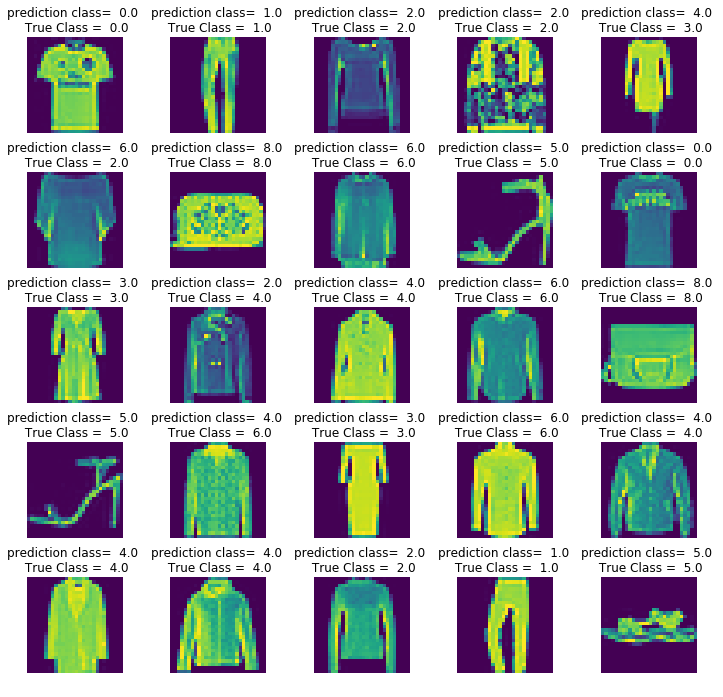

In [22]:
L = 5
W = 5
fig, axes = plt.subplots(L,W, figsize=(12,12))

axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))

    axes[i].set_title('prediction class= {: 0.1f} \n True Class = {: 0.1f}' .format(predicted_classes[i], y_test[i]))

    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


 # Confusion Matrix

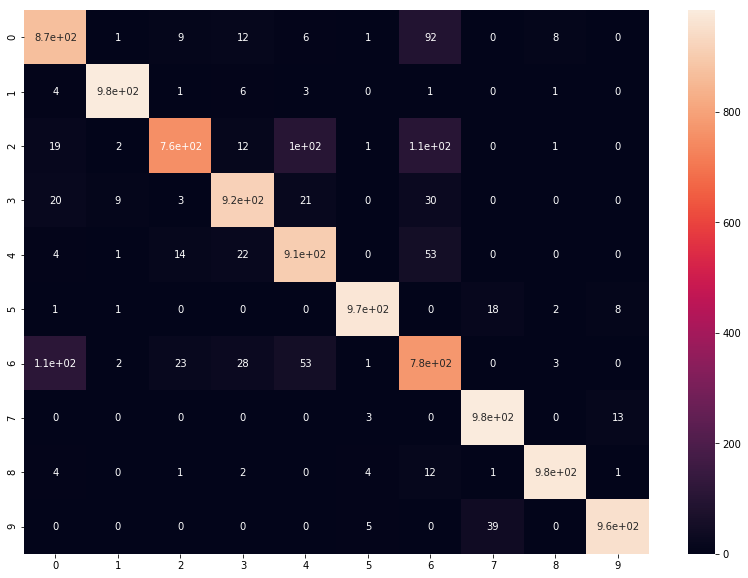

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(14,10))

sns.heatmap(cm, annot=True)


In [24]:
from sklearn.metrics import classification_report
num_classes =10
target_names = ['class {}' .format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names=target_names))



              precision    recall  f1-score   support

     class 0       0.84      0.87      0.86      1000
     class 1       0.98      0.98      0.98      1000
     class 2       0.94      0.76      0.84      1000
     class 3       0.92      0.92      0.92      1000
     class 4       0.83      0.91      0.87      1000
     class 5       0.98      0.97      0.98      1000
     class 6       0.72      0.78      0.75      1000
     class 7       0.94      0.98      0.96      1000
     class 8       0.98      0.97      0.98      1000
     class 9       0.98      0.96      0.97      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

